In this notebook I will make a catalog of the magnetic field, density and temperature measurements in Jason's shotset 1.
The physical quantities are imported from Jason's post-processing scripts and the measurement locations are imported from script pro00170.

In [1]:
import numpy as np
import scipy.io.idl as idl

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
sns.set_context('poster')
import matplotlib as mpl

from scipy.interpolate import griddata

# Define plotting fucntion

In [2]:
def plot_contours_in_time(quantity_dict, pos_dict, colormap, times_to_plot,
                          rows=11, columns=2, column_width=8, cbar_width=1, figsize=(40,100)):
    r"""
    Plots contours at different time points of physical quantities with probe measurement locations.
    """
    fig = plt.figure(figsize=figsize)
    #fig.suptitle(figure_title)
    gs = mpl.gridspec.GridSpec(rows, columns*column_width + columns*cbar_width)
    column_array_element = np.asarray([0, column_width, 0, cbar_width])
    column_array = np.cumsum(np.tile(column_array_element, columns))
    plot_axes_list = []
    cbar_axes_list = []
    counter = 0
    for row in xrange(rows):
        for column in xrange(columns):
            column_index = column * 4
            axis = plt.subplot(gs[row, column_array[column_index]:column_array[column_index + 1]])
            plot_axes_list.append(axis)
            column_index = column_index + 2
            axis = plt.subplot(gs[row, column_array[column_index]:column_array[column_index + 1]])
            cbar_axes_list.append(axis) 
            counter += 1

    quantity_max = quantity_dict['a_out'].max()
    quantity_min = quantity_dict['a_out'].min()
    x_min = np.nanmin(pos_dict['x_out'])
    x_max = np.nanmax(pos_dict['x_out'])
    y_min = np.nanmin(pos_dict['y_out'])
    y_max = np.nanmax(pos_dict['y_out'])
    x_points = np.linspace(x_min, x_max, 100)
    y_points = np.linspace(y_min, y_max, 100)
    gridx, gridy = np.meshgrid(x_points, y_points)

    for i, time in enumerate(times_to_plot):
        quantity_interpolated = griddata(np.dstack((quantity_dict['x_out'], 
                                                    quantity_dict['y_out']))[0],
                                                    quantity_dict['a_out'][time],
                                                   (gridx, gridy))
        contour = plot_axes_list[i].contourf(gridx, gridy, quantity_interpolated, 
                                             cmap=colormap, vmax=quantity_max, vmin=quantity_min)
        plot_axes_list[i].set_aspect('equal')

        plot_axes_list[i].scatter(pos_dict['x_out'], pos_dict['y_out'], marker="o", 
                                  facecolor='none', edgecolor='black', s=40)
        plot_axes_list[i].set_title('Delay in ms:' +str(quantity_dict['delays'][i]))
        plot_axes_list[i].set_xlabel('x [m]')
        plot_axes_list[i].set_ylabel('y [m]')
        plt.colorbar(contour, cax=cbar_axes_list[i], format='%.0e')
    plt.tight_layout()
    plt.show()

# $B_z$ from bdot3a

## get probe locations

In [148]:
%%sh
source ~/.bashrc
idl -e "pro00170, 'bdot3a', 'z', shotset=1"  

modify IDL startup in /Users/vonderlinden2/rsx_drive/Applications/IDL/idl_startup.pro
executing that procedure now...
fundamental procedures are stored in /Users/vonderlinden2/rsx_drive/Applications/IDL/
use x11 xterm instead of terminal to maintain focus on the terminal
115110249775


IDL Version 8.5, Mac OS X (darwin x86_64 m64).
(c) 2015, Exelis Visual Information Solutions, Inc., a subsidiary of Harris Corporation.
Installation number: 5697-1.
Licensed for use by: ENERGY - LAWRENCE LIVERMORE NATIONAL LAB

% LOADCT: Loading table RED TEMPERATURE
% Compiled module: PRO00170.
% Compiled module: GET_SHOTS.
% Compiled module: GET_SENSOR.
% Compiled module: PRO00130.
% Compiled module: TRANSFORM_SENSOR.
% Compiled module: PRO00160.
% Compiled module: PRO00C00.
% Compiled module: PRO00B00.
% Compiled module: PRO00C20.
% LOADCT: Loading table RED TEMPERATURE
% Compiled module: PROCEDURE_PATH.
% Compiled module: STAMP.
% READ: End of file encountered. Unit: 0, File: <stdin>
% Execution halted at: STAMP              51
   /Users/vonderlinden2/rsx_drive/Applications/IDL/stamp.pro
%                      PRO00170          160
   /Users/vonderlinden2/rsx_drive/RSX/IDL/pro00170.pro
%                      $MAIN$          


In [3]:
b_z_bdot3a_pos = idl.readsav('115110249775.sav', verbose=True)

--------------------------------------------------
Date: Mon Nov  2 13:49:35 2015
User: vonderlinden2
Host: n9114737.llnl.gov
--------------------------------------------------
Format: 12
Architecture: x86_64
Operating System: darwin
IDL Version: 8.5
--------------------------------------------------
Successfully read 5 records of which:
 - 2 are of type VARIABLE
 - 1 are of type TIMESTAMP
 - 1 are of type VERSION
--------------------------------------------------
Available variables:
 - x_out [<type 'numpy.ndarray'>]
 - y_out [<type 'numpy.ndarray'>]
--------------------------------------------------


# get post-processed magnetic field measurements 

In [150]:
%%sh
source ~/.bashrc
idl -e "pro00710,'bdot3a','z','b',indgen(21)/50.-0.085,0,shotset='001',/cur"

modify IDL startup in /Users/vonderlinden2/rsx_drive/Applications/IDL/idl_startup.pro
executing that procedure now...
fundamental procedures are stored in /Users/vonderlinden2/rsx_drive/Applications/IDL/
use x11 xterm instead of terminal to maintain focus on the terminal
basename:    115110249799


IDL Version 8.5, Mac OS X (darwin x86_64 m64).
(c) 2015, Exelis Visual Information Solutions, Inc., a subsidiary of Harris Corporation.
Installation number: 5697-1.
Licensed for use by: ENERGY - LAWRENCE LIVERMORE NATIONAL LAB

% LOADCT: Loading table RED TEMPERATURE
% Compiled module: PRO00710.
% Compiled module: PRO00C00.
% Compiled module: PRO00150.
% Compiled module: GET_SHOTS.
% Compiled module: GET_SENSOR.
% Compiled module: PRO00130.
% Compiled module: TRANSFORM_SENSOR.
% Compiled module: PRO00140.
% Compiled module: PRO00100.
% Compiled module: MDSOPEN.
% Compiled module: MDSVALUE.
% Compiled module: MDSCHECKARG.
% Compiled module: MDSISCLIENT.
% Compiled module: MDSIDLIMAGE.
% Compiled module: PRO00160.
% Compiled module: MDSCLOSE.
% Compiled module: PRO0060C.
% Compiled module: PROCEDURE_PATH.
% Compiled module: STAMP.
% READ: End of file encountered. Unit: 0, File: <stdin>
% Execution halted at: STAMP              51
   /Users/vonderlinden2/rsx_drive/Applications/IDL/stamp.p

In [4]:
b_z_bdot3a_dict = idl.readsav('115110249799.sav', verbose=True)

--------------------------------------------------
Date: Mon Nov  2 13:50:34 2015
User: vonderlinden2
Host: n9114737.llnl.gov
--------------------------------------------------
Format: 12
Architecture: x86_64
Operating System: darwin
IDL Version: 8.5
--------------------------------------------------
Successfully read 7 records of which:
 - 4 are of type VARIABLE
 - 1 are of type TIMESTAMP
 - 1 are of type VERSION
--------------------------------------------------
Available variables:
 - x_out [<type 'numpy.ndarray'>]
 - delays [<type 'numpy.ndarray'>]
 - y_out [<type 'numpy.ndarray'>]
 - a_out [<type 'numpy.ndarray'>]
--------------------------------------------------


In [6]:
cmap = mpl.colors.ListedColormap(sns.color_palette("coolwarm", 256))

## Contour plots of $B_z$ at $z=0.25$ (B_z at z=0.25)

/Users/vonderlinden2/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


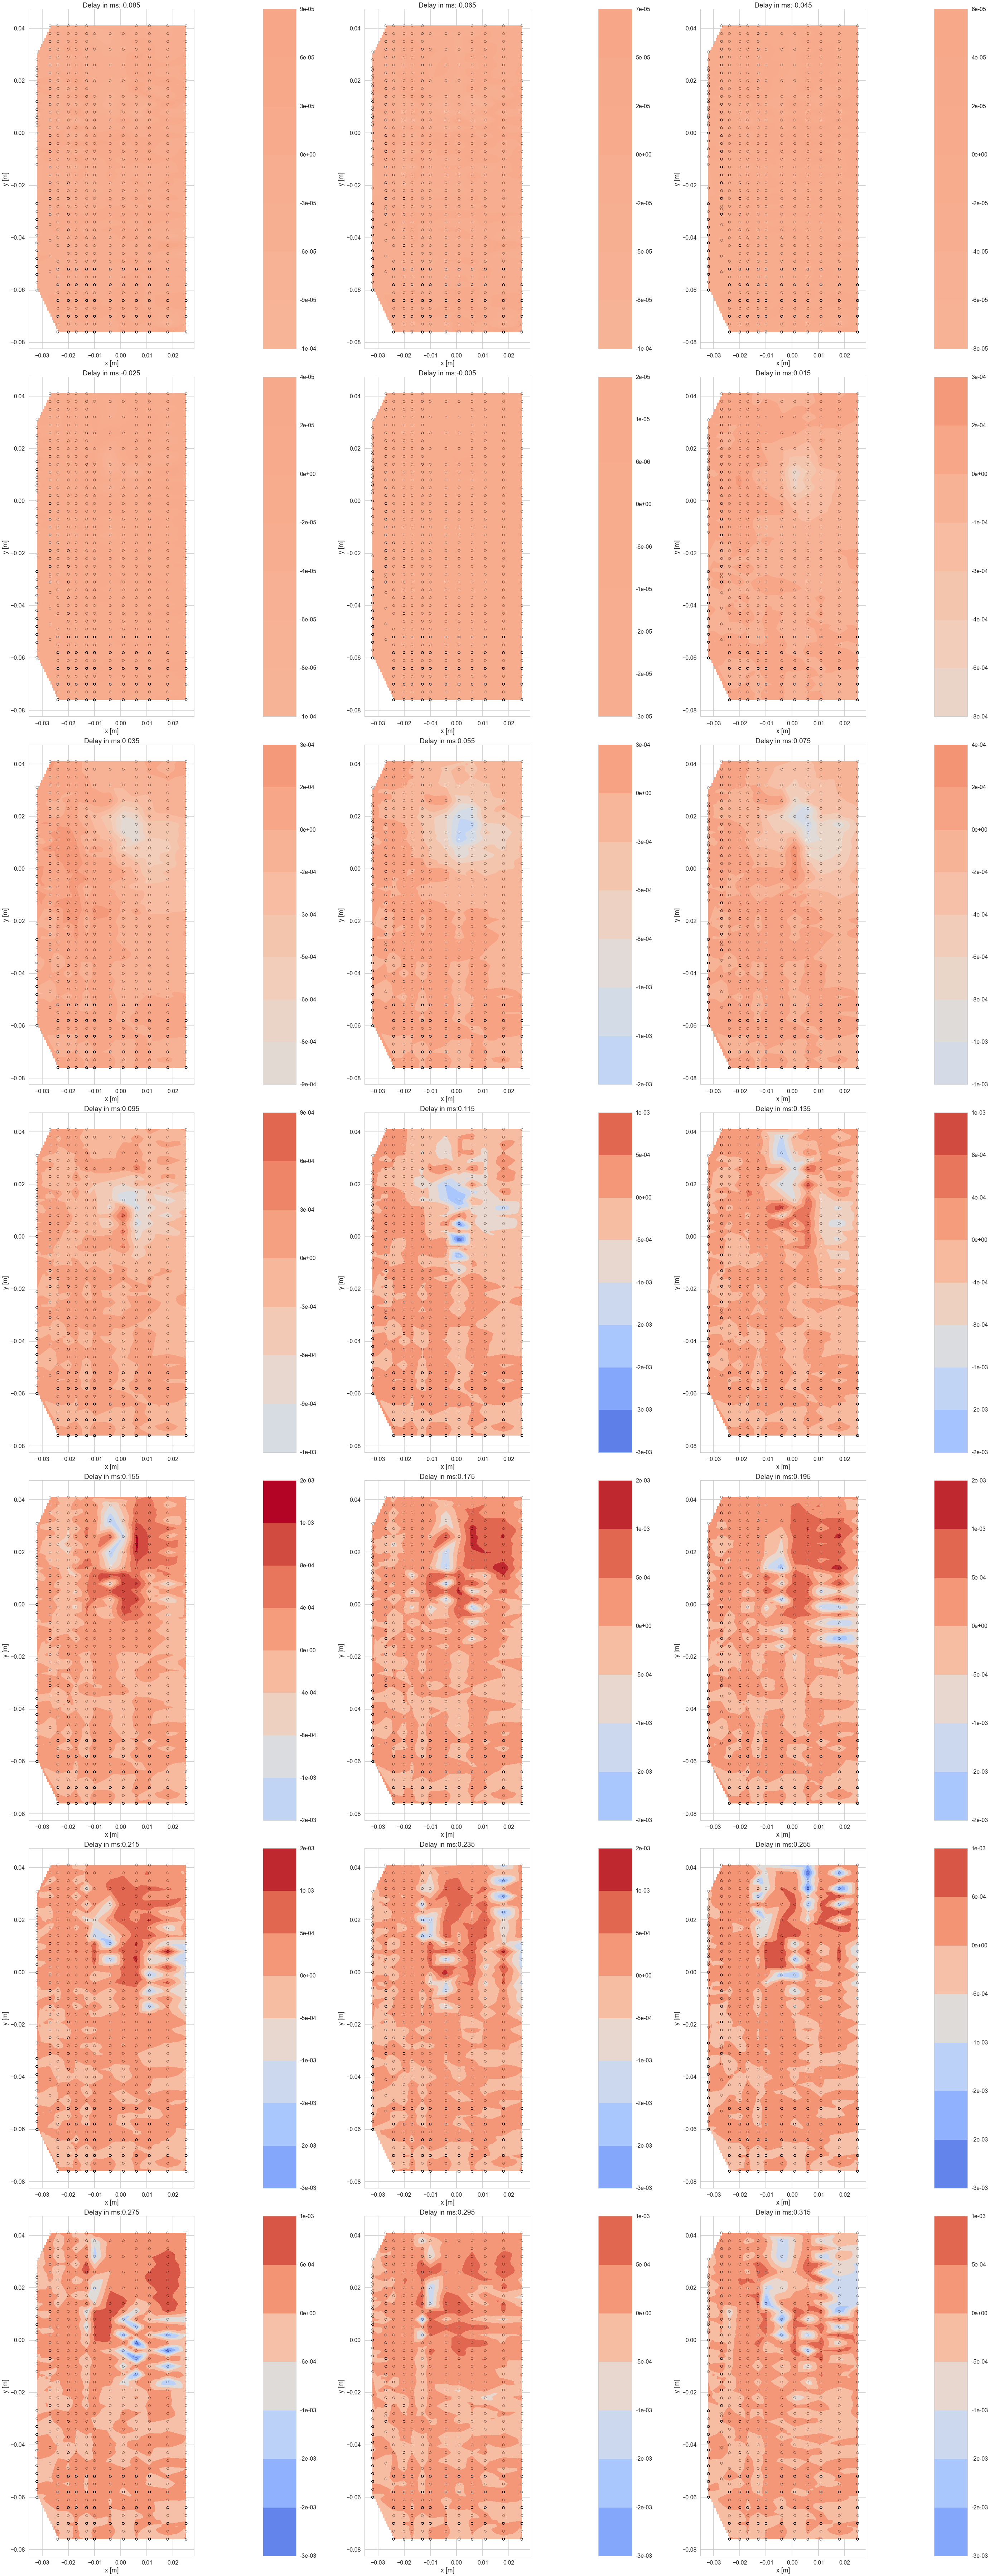

In [7]:
plot_contours_in_time(b_z_bdot3a_dict, b_z_bdot3a_pos, cmap, np.arange(21), columns=3, rows=7)

In [5]:
%%sh
source ~/.bashrc
idl -e "pro00710,'bdot3a','x','b',indgen(21)*1./20.,1,shotset='001',current_rise=0"

/Applications/exelis/idl/bin/idl: line 466: /Applications/exelis/IDL/lib/bin/bin.darwin.x86_64/idl: No such file or directory
/Applications/exelis/idl/bin/idl: line 466: exec: /Applications/exelis/IDL/lib/bin/bin.darwin.x86_64/idl: cannot execute: No such file or directory


# $B_x$ from Bdot probe 3a

In [130]:
%%sh
source ~/.bashrc
idl -e "pro00170, 'bdot3a', 'x', shotset=1"  

modify IDL startup in /Users/vonderlinden2/rsx_drive/Applications/IDL/idl_startup.pro
executing that procedure now...
fundamental procedures are stored in /Users/vonderlinden2/rsx_drive/Applications/IDL/
use x11 xterm instead of terminal to maintain focus on the terminal
115110247965


IDL Version 8.5, Mac OS X (darwin x86_64 m64).
(c) 2015, Exelis Visual Information Solutions, Inc., a subsidiary of Harris Corporation.
Installation number: 5697-1.
Licensed for use by: ENERGY - LAWRENCE LIVERMORE NATIONAL LAB

% LOADCT: Loading table RED TEMPERATURE
% Compiled module: PRO00170.
% Compiled module: GET_SHOTS.
% Compiled module: GET_SENSOR.
% Compiled module: PRO00130.
% Compiled module: TRANSFORM_SENSOR.
% Compiled module: PRO00160.
% Compiled module: PRO00C00.
% Compiled module: PRO00B00.
% Compiled module: PRO00C20.
% LOADCT: Loading table RED TEMPERATURE
% Compiled module: PROCEDURE_PATH.
% Compiled module: STAMP.
% READ: End of file encountered. Unit: 0, File: <stdin>
% Execution halted at: STAMP              51
   /Users/vonderlinden2/rsx_drive/Applications/IDL/stamp.pro
%                      PRO00170          160
   /Users/vonderlinden2/rsx_drive/RSX/IDL/pro00170.pro
%                      $MAIN$          


In [135]:
b_x_bdot3a_pos = idl.readsav('115110247965.sav', verbose=True)

--------------------------------------------------
Date: Mon Nov  2 13:19:25 2015
User: vonderlinden2
Host: n9114737.llnl.gov
--------------------------------------------------
Format: 12
Architecture: x86_64
Operating System: darwin
IDL Version: 8.5
--------------------------------------------------
Successfully read 5 records of which:
 - 2 are of type VARIABLE
 - 1 are of type TIMESTAMP
 - 1 are of type VERSION
--------------------------------------------------
Available variables:
 - x_out [<type 'numpy.ndarray'>]
 - y_out [<type 'numpy.ndarray'>]
--------------------------------------------------


In [96]:
%%sh
source ~/.bashrc
idl -e "pro00710,'bdot3a','x','b',indgen(21)/50.-0.085,0,shotset='001',/cur"

modify IDL startup in /Users/vonderlinden2/rsx_drive/Applications/IDL/idl_startup.pro
executing that procedure now...
fundamental procedures are stored in /Users/vonderlinden2/rsx_drive/Applications/IDL/
use x11 xterm instead of terminal to maintain focus on the terminal
basename:    115110242981


IDL Version 8.5, Mac OS X (darwin x86_64 m64).
(c) 2015, Exelis Visual Information Solutions, Inc., a subsidiary of Harris Corporation.
Installation number: 5697-1.
Licensed for use by: ENERGY - LAWRENCE LIVERMORE NATIONAL LAB

% LOADCT: Loading table RED TEMPERATURE
% Compiled module: PRO00710.
% Compiled module: PRO00C00.
% Compiled module: PRO00150.
% Compiled module: GET_SHOTS.
% Compiled module: GET_SENSOR.
% Compiled module: PRO00130.
% Compiled module: TRANSFORM_SENSOR.
% Compiled module: PRO00140.
% Compiled module: PRO00100.
% Compiled module: MDSOPEN.
% Compiled module: MDSVALUE.
% Compiled module: MDSCHECKARG.
% Compiled module: MDSISCLIENT.
% Compiled module: MDSIDLIMAGE.
% Compiled module: PRO00160.
% Compiled module: MDSCLOSE.
% Compiled module: PRO0060C.
% Compiled module: PROCEDURE_PATH.
% Compiled module: STAMP.
% READ: End of file encountered. Unit: 0, File: <stdin>
% Execution halted at: STAMP              51
   /Users/vonderlinden2/rsx_drive/Applications/IDL/stamp.p

In [129]:
b_x_bdot3a_dict = idl.readsav('115110242981.sav', verbose=True)

--------------------------------------------------
Date: Mon Nov  2 11:56:39 2015
User: vonderlinden2
Host: n9114737.llnl.gov
--------------------------------------------------
Format: 12
Architecture: x86_64
Operating System: darwin
IDL Version: 8.5
--------------------------------------------------
Successfully read 7 records of which:
 - 4 are of type VARIABLE
 - 1 are of type TIMESTAMP
 - 1 are of type VERSION
--------------------------------------------------
Available variables:
 - x_out [<type 'numpy.ndarray'>]
 - delays [<type 'numpy.ndarray'>]
 - y_out [<type 'numpy.ndarray'>]
 - a_out [<type 'numpy.ndarray'>]
--------------------------------------------------


## Contour plots of $B_x$ at $z=0.25$ (B_x at z=0.25)

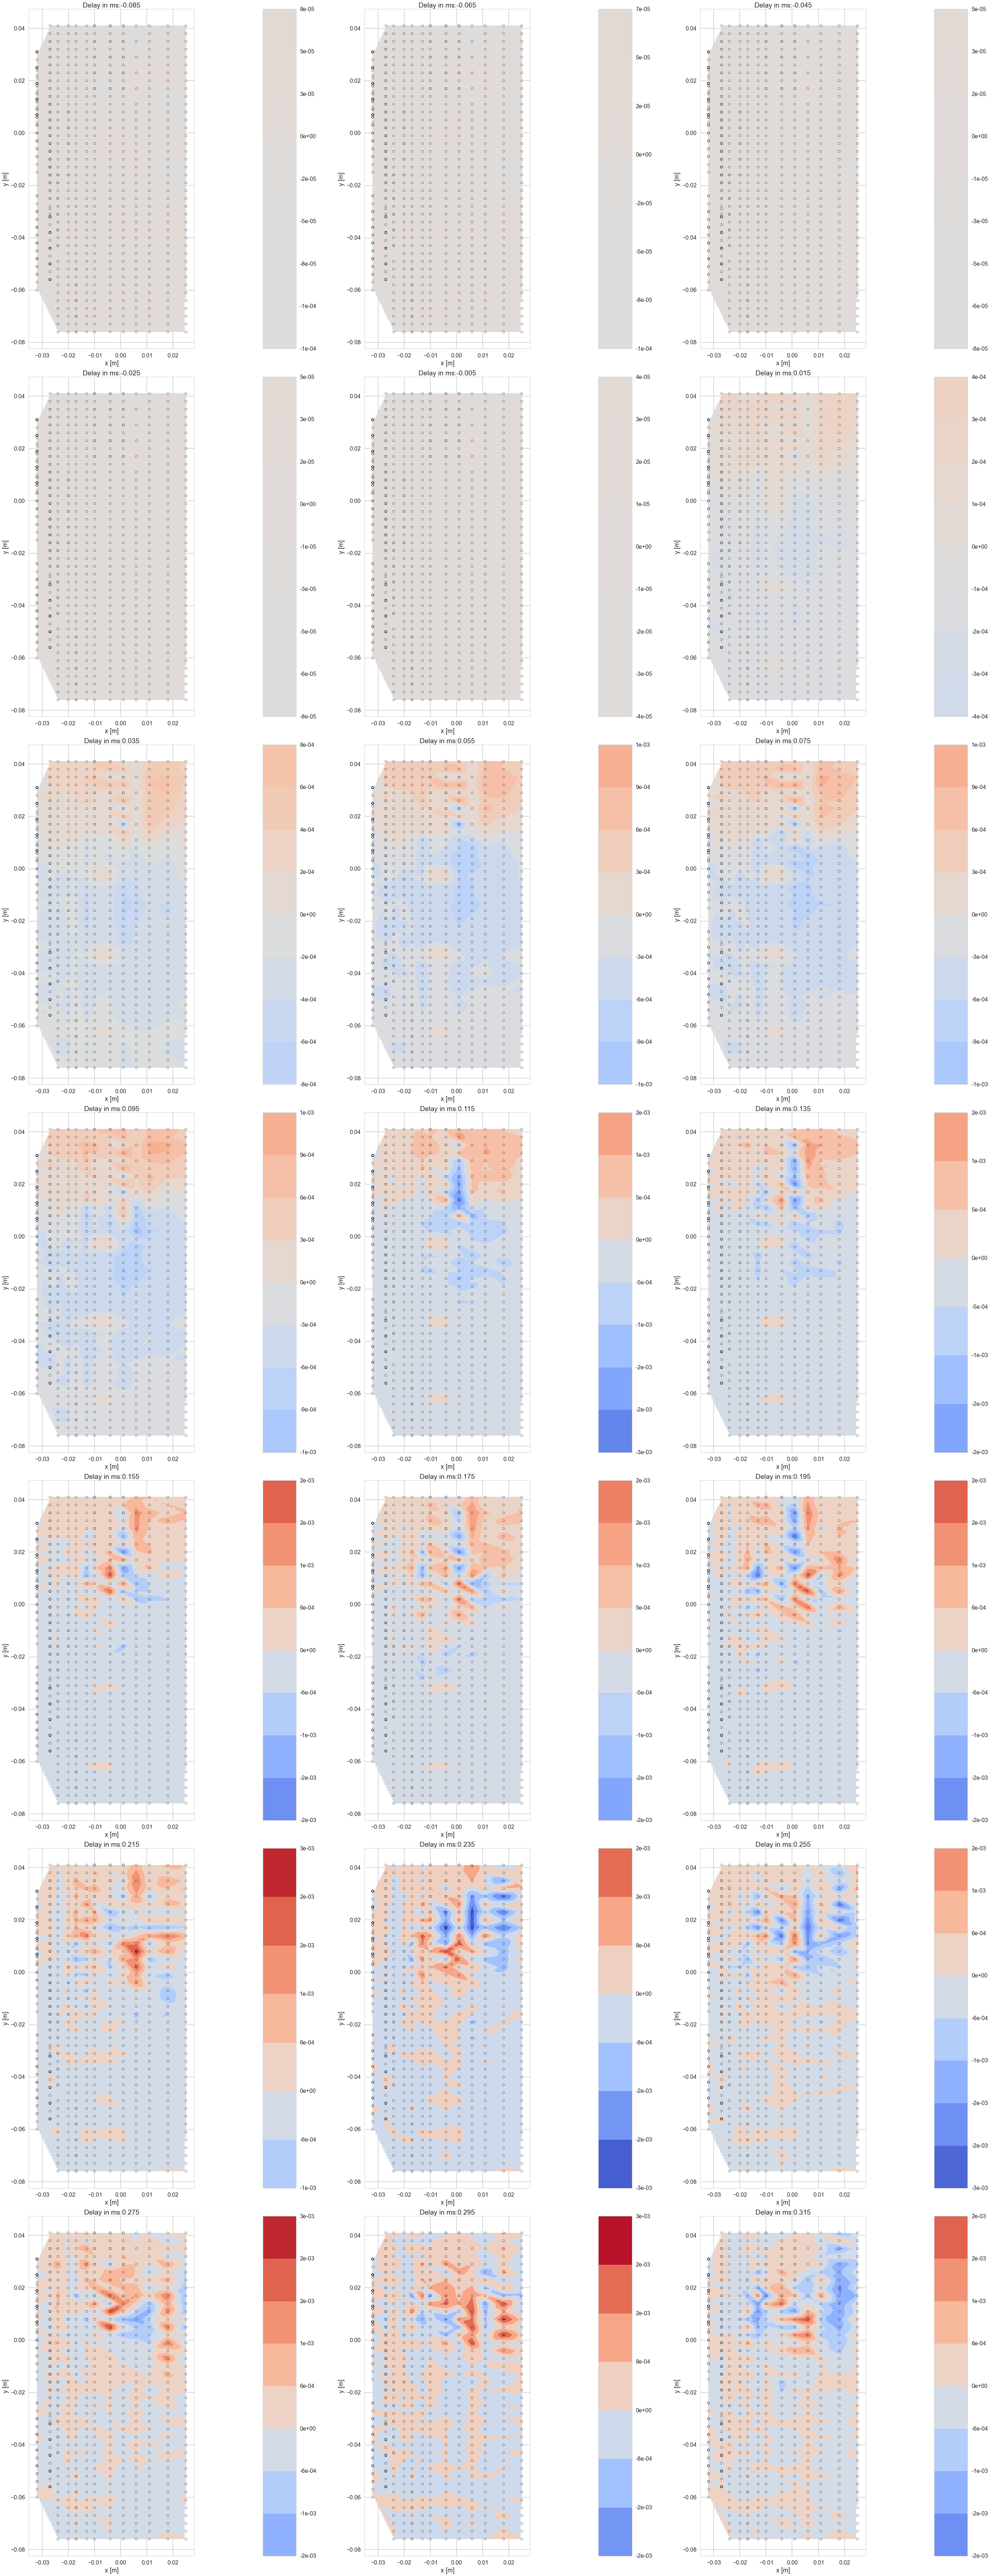

In [163]:
plot_contours_in_time(b_x_bdot3a_dict, b_x_bdot3a_pos, cmap, np.arange(21), columns=3, rows=7)

# $B_{y}$ fom bdot probe 3a

In [154]:
%%sh
source ~/.bashrc
idl -e "pro00170, 'bdot3a', 'y', shotset=1"  

modify IDL startup in /Users/vonderlinden2/rsx_drive/Applications/IDL/idl_startup.pro
executing that procedure now...
fundamental procedures are stored in /Users/vonderlinden2/rsx_drive/Applications/IDL/
use x11 xterm instead of terminal to maintain focus on the terminal
115110249955


IDL Version 8.5, Mac OS X (darwin x86_64 m64).
(c) 2015, Exelis Visual Information Solutions, Inc., a subsidiary of Harris Corporation.
Installation number: 5697-1.
Licensed for use by: ENERGY - LAWRENCE LIVERMORE NATIONAL LAB

% LOADCT: Loading table RED TEMPERATURE
% Compiled module: PRO00170.
% Compiled module: GET_SHOTS.
% Compiled module: GET_SENSOR.
% Compiled module: PRO00130.
% Compiled module: TRANSFORM_SENSOR.
% Compiled module: PRO00160.
% Compiled module: PRO00C00.
% Compiled module: PRO00B00.
% Compiled module: PRO00C20.
% LOADCT: Loading table RED TEMPERATURE
% Compiled module: PROCEDURE_PATH.
% Compiled module: STAMP.
% READ: End of file encountered. Unit: 0, File: <stdin>
% Execution halted at: STAMP              51
   /Users/vonderlinden2/rsx_drive/Applications/IDL/stamp.pro
%                      PRO00170          160
   /Users/vonderlinden2/rsx_drive/RSX/IDL/pro00170.pro
%                      $MAIN$          


In [155]:
b_y_bdot3a_pos = idl.readsav('115110249955.sav', verbose=True)

--------------------------------------------------
Date: Mon Nov  2 13:52:35 2015
User: vonderlinden2
Host: n9114737.llnl.gov
--------------------------------------------------
Format: 12
Architecture: x86_64
Operating System: darwin
IDL Version: 8.5
--------------------------------------------------
Successfully read 5 records of which:
 - 2 are of type VARIABLE
 - 1 are of type TIMESTAMP
 - 1 are of type VERSION
--------------------------------------------------
Available variables:
 - x_out [<type 'numpy.ndarray'>]
 - y_out [<type 'numpy.ndarray'>]
--------------------------------------------------


In [156]:
%%sh
source ~/.bashrc
idl -e "pro00710,'bdot3a','y','b',indgen(21)/50.-0.085,0,shotset='001',/cur"

modify IDL startup in /Users/vonderlinden2/rsx_drive/Applications/IDL/idl_startup.pro
executing that procedure now...
fundamental procedures are stored in /Users/vonderlinden2/rsx_drive/Applications/IDL/
use x11 xterm instead of terminal to maintain focus on the terminal
basename:    115110249976


IDL Version 8.5, Mac OS X (darwin x86_64 m64).
(c) 2015, Exelis Visual Information Solutions, Inc., a subsidiary of Harris Corporation.
Installation number: 5697-1.
Licensed for use by: ENERGY - LAWRENCE LIVERMORE NATIONAL LAB

% LOADCT: Loading table RED TEMPERATURE
% Compiled module: PRO00710.
% Compiled module: PRO00C00.
% Compiled module: PRO00150.
% Compiled module: GET_SHOTS.
% Compiled module: GET_SENSOR.
% Compiled module: PRO00130.
% Compiled module: TRANSFORM_SENSOR.
% Compiled module: PRO00140.
% Compiled module: PRO00100.
% Compiled module: MDSOPEN.
% Compiled module: MDSVALUE.
% Compiled module: MDSCHECKARG.
% Compiled module: MDSISCLIENT.
% Compiled module: MDSIDLIMAGE.
% Compiled module: PRO00160.
% Compiled module: MDSCLOSE.
% Compiled module: PRO0060C.
% Compiled module: PROCEDURE_PATH.
% Compiled module: STAMP.
% READ: End of file encountered. Unit: 0, File: <stdin>
% Execution halted at: STAMP              51
   /Users/vonderlinden2/rsx_drive/Applications/IDL/stamp.p

In [157]:
b_y_bdot3a_dict = idl.readsav('115110249976.sav', verbose=True)

--------------------------------------------------
Date: Mon Nov  2 13:53:37 2015
User: vonderlinden2
Host: n9114737.llnl.gov
--------------------------------------------------
Format: 12
Architecture: x86_64
Operating System: darwin
IDL Version: 8.5
--------------------------------------------------
Successfully read 7 records of which:
 - 4 are of type VARIABLE
 - 1 are of type TIMESTAMP
 - 1 are of type VERSION
--------------------------------------------------
Available variables:
 - x_out [<type 'numpy.ndarray'>]
 - delays [<type 'numpy.ndarray'>]
 - y_out [<type 'numpy.ndarray'>]
 - a_out [<type 'numpy.ndarray'>]
--------------------------------------------------


## Contour plots of $B_y$ at $z=0.25$  (B_y at z=0.25)

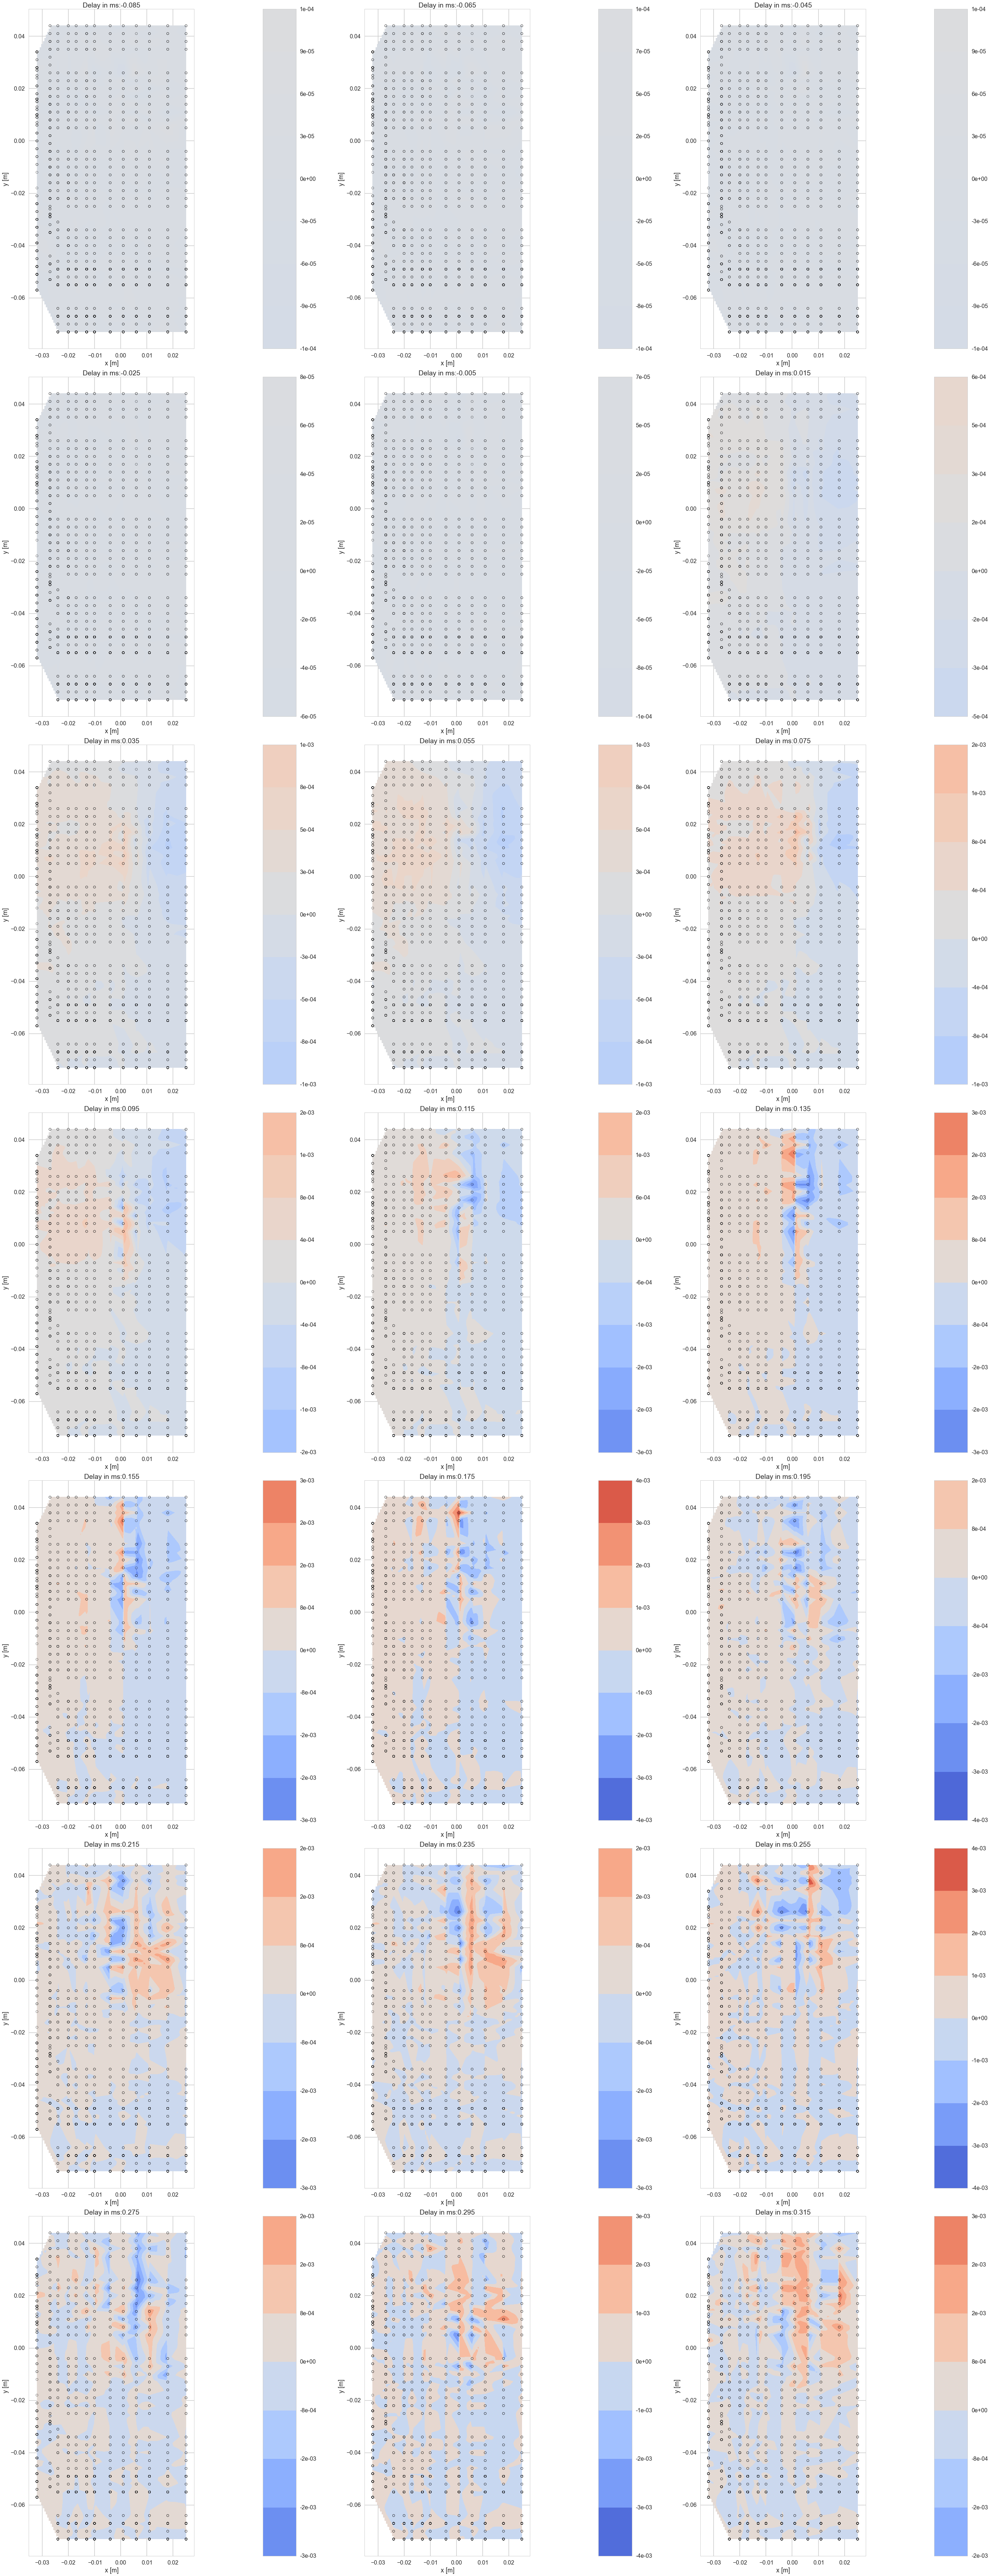

In [165]:
plot_contours_in_time(b_y_bdot3a_dict, b_y_bdot3a_pos, cmap, np.arange(21), rows=7, columns=3)